In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Web scraping 

The [National UFO Reporting Center](https://nuforc.org/databank/) provides some beautiful and well-arranged dataset to be used, but since they are in HTML content, we will use web scraping to fetch the data and convert it into .csv files.

In [20]:
# Lists of URLs
URLs = ['https://nuforc.org/webreports/ndxevent.html',
        'https://nuforc.org/webreports/ndxloc.html',
        'https://nuforc.org/webreports/ndxshape.html',
        'https://nuforc.org/webreports/ndxpost.html']

# Name of datasets
dataset_names = ['event_date', 'state', 'ufo_shape', 'date_posted']

def scrape_and_save_dataset(url, dataset_name):
    # Fetch webpage content
        response = requests.get(url)
        html_content = response.content

        # Parse HTML content
        soup = BeautifulSoup(html_content, 'html.parser')

        # Find the table in HTML
        table = soup.find('table')

        # Extract table headers
        headers = [header.text for header in table.find_all('th')]

        # Extract rows 
        rows = []
        for row in table.find_all('tr'):
                cells = row.find_all('td')
                if cells:
                        rows.append([cell.text for cell in cells])

        # Convert to dataframe
        df = pd.DataFrame(rows, columns=headers)

        # Convert to csv
        df.to_csv(f'{dataset_name}.csv', index=False)

# Loop
for url, dataset_name in zip(URLs, dataset_names):
        scrape_and_save_dataset(url, dataset_name)

## Load Datasets and Explore

In [21]:
# date_posted
date_posted = pd.read_csv("date_posted.csv")
date_posted.head()

,Reports,Count
0,05/19/2023,522
1,04/09/2023,323
2,03/06/2023,1274
3,12/22/2022,1255
4,10/08/2022,653


In [22]:
print(date_posted.info())
date_posted.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reports  620 non-null    object
 1   Count    620 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.8+ KB
None


,Count
count,620.000000
mean,232.985484
std,265.571505
min,1.000000
25%,88.000000
50%,143.000000
75%,259.000000
max,1835.000000


In [60]:
# event date
event_date = pd.read_csv("event_date.csv")
event_date.head()

,Reports,Count
0,05/2023,138
1,04/2023,267
2,03/2023,269
3,02/2023,390
4,01/2023,310


In [24]:
print(event_date.info())
event_date.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reports  978 non-null    object
 1   Count    978 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.4+ KB
None


,Count
count,978.000000
mean,147.700409
std,214.727442
min,1.000000
25%,6.000000
50%,23.000000
75%,276.000000
max,1129.000000


In [24]:
# state
state = pd.read_csv("state.csv")
state['Reports'] = state['Reports'].str.title()
state.head()

,Reports,Count
0,Alabama,1355
1,Alaska,630
2,Arizona,4824
3,Arkansas,1245
4,California,15766


In [26]:
print(state.info())
state.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reports  65 non-null     object
 1   Count    65 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


,Count
count,65.000000
mean,2223.030769
std,2713.337918
min,8.000000
25%,597.000000
50%,1355.000000
75%,2648.000000
max,15766.000000


In [27]:
# ufo shape
ufo_shape = pd.read_csv("ufo_shape.csv")
ufo_shape.head()

,Reports,Count
0,Unspecified,6377
1,Changing,3802
2,Chevron,1700
3,Cigar,3652
4,Circle,13958


In [44]:
print(ufo_shape.info())
ufo_shape.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reports  26 non-null     object
 1   Count    26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 544.0+ bytes
None


,Count
count,26.000000
mean,5555.807692
std,5988.339383
min,1.000000
25%,1362.500000
50%,3727.000000
75%,8272.500000
max,27034.000000


Data looked very clean, no missing values

## Data Visualization

### Number of UFO Sightings over Time (Time-Series)

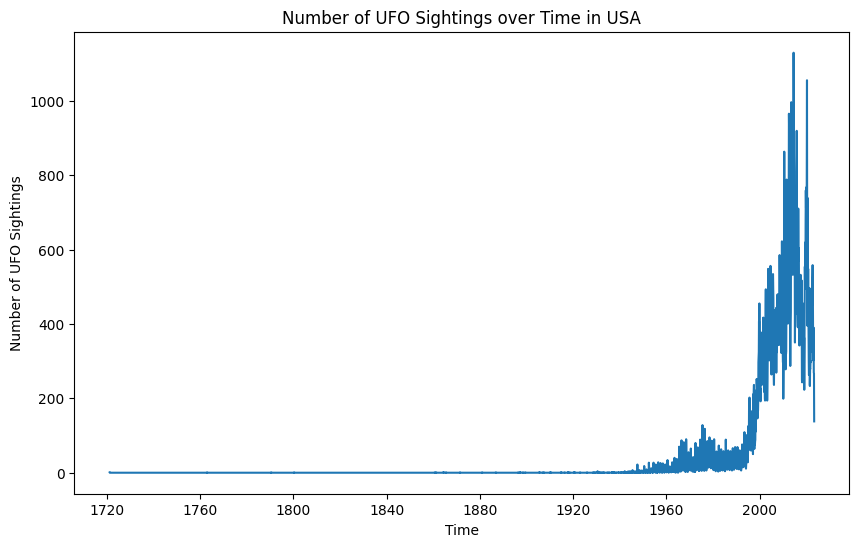

In [50]:
import matplotlib.pyplot as plt

# Change 'Reports' to datetime
event_date['Reports'] = pd.to_datetime(event_date['Reports'], format='%m/%Y', errors='coerce')

# Set 'Reports' as index
event_date.set_index("Reports", inplace=True)

# Resample data to montly frequency and sum counts
monthly_date = event_date.resample("M").sum()

# plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_date, label='Number of UFO Sightings')
plt.xlabel('Time')
plt.ylabel("Number of UFO Sightings")
plt.title('Number of UFO Sightings over Time in USA')
plt.show()


Not much reports from 1720 - 1940. We draw another plot from 1940 to the current time.

In [71]:
event_date = pd.read_csv('event_date.csv')
event_date['Reports'] = pd.to_datetime(event_date['Reports'], format='%m/%Y', errors='coerce')
event_date = event_date[event_date['Reports'] >= '01/1940']
event_date.tail()

,Reports,Count
919,1942-02-01,4
920,1941-07-01,2
921,1941-06-01,2
922,1940-08-01,1
923,1940-06-01,1


In [72]:
# Get the date of top 5 most reported UFO sightings
event_date.nlargest(5, 'Count')

,Reports,Count
106,2014-07-01,1129
37,2020-04-01,1055
118,2013-07-01,996
130,2012-07-01,965
105,2014-08-01,944


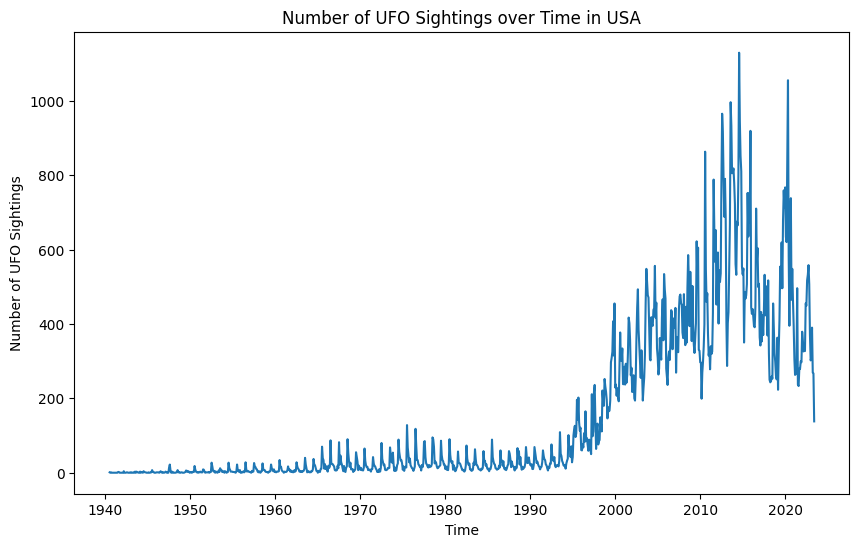

In [68]:
import matplotlib.pyplot as plt

# Set 'Reports' as index
event_date.set_index("Reports", inplace=True)

# Resample data to montly frequency and sum counts
monthly_date = event_date.resample("M").sum()

# plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_date, label='Number of UFO Sightings')
plt.xlabel('Time')
plt.ylabel("Number of UFO Sightings")
plt.title('Number of UFO Sightings over Time in USA')
plt.show()

### Choropleth 

In [33]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load geospatial data for the United States
path_to_shapefile = 'ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp'
world = gpd.read_file(path_to_shapefile)
usa = world[world['iso_a2'] == 'US']
usa.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."


In [34]:
# Merge the report data with the GeoDataFrame
usa = usa.merge(state, left_on="name", right_on="Reports", how="left")
usa.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,Reports,Count
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.95766 47.28691, -90.13175 47.292...",Minnesota,2057.0
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-116.04823 49.00037, -113.05950 49.0...",Montana,980.0
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-97.22894 49.00089, -97.21414 48.902...",North Dakota,271.0
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080...",Hawaii,660.0
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-116.04823 49.00037, -115.96780 47.9...",Idaho,1321.0


In [49]:
# map state names to its respective code

code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

usa['Code'] = usa['name'].map(code)

In [54]:
import plotly.express as px

fig = px.choropleth(usa, locations='Code', color='Count',
                    color_continuous_scale="Viridis",
                    hover_name='name',
                    locationmode='USA-states',
                    labels={'Count': 'Number of UFO Sightings'},
                    title='Number of UFO Sightings in USA (1400-2023)',
                    scope='usa')

fig.show()

In [58]:
state.nlargest(5, 'Count')

,Reports,Count
4,California,15766
51,International,11138
9,Florida,8023
47,Washington,7018
43,Texas,5955
